In [251]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.distance import vincenty
%matplotlib inline

# Prompt
The data files are from two mobility companies. We are interested in learning more about the dynamics of the market in which they operate.

1. Describe the operations of these two mobility companies.

2. Please estimate the number of scooters company b operates in this geography? Simpler mechanisms of estimation are preferred.

# Data Cleaning + Initial EDA
 Before we begin any type of analysis we'll need to understand our data. We break it down to the following steps:
1. Check Data Integrity
    - explore Null values
    - explore outliers/unusual values
2. Initial Data Understanding
    - explore intersting variations + columns to further explore

In [252]:
c1_a = pd.read_csv('company_a_1.csv')
c2_a = pd.read_csv('company_a_2.csv')
c3_a = pd.read_csv('company_a_3.csv')
c4_a = pd.read_csv('company_a_4.csv')
c5_a = pd.read_csv('company_a_5.csv')
c1_b = pd.read_csv('company_b_1.csv')
c2_b = pd.read_csv('company_b_2.csv')

In [253]:
for df in [c1_a,c2_a,c3_a,c4_a,c5_a,c1_b,c2_b]:
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6834 entries, 0 to 6833
Data columns (total 9 columns):
TripID            6834 non-null object
ScooterID         6834 non-null object
StartTime         6834 non-null object
EndTime           6834 non-null object
StartLatitude     6834 non-null float64
StartLongitude    6834 non-null float64
EndLatitude       6834 non-null float64
EndLongitude      6834 non-null float64
TripDistance      6834 non-null float64
dtypes: float64(5), object(4)
memory usage: 480.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12337 entries, 0 to 12336
Data columns (total 9 columns):
TripID            12337 non-null object
ScooterID         12337 non-null object
StartTime         12337 non-null object
EndTime           12337 non-null object
StartLatitude     12337 non-null float64
StartLongitude    12337 non-null float64
EndLatitude       12337 non-null float64
EndLongitude      12337 non-null float64
TripDistance      12337 non-null float64
dtypes

Once we read in all the csvs, a quick overview shows all csvs for Company A have the same column names and datatypes. Similarly with Company B. We can concat these dataframes down to 2 distinct dataframes.

In [254]:
c_a = pd.concat([c1_a,c2_a,c3_a,c4_a,c5_a])
c_b = pd.concat([c1_b,c2_b])

In [255]:
c_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57365 entries, 0 to 8980
Data columns (total 9 columns):
TripID            57365 non-null object
ScooterID         57365 non-null object
StartTime         57365 non-null object
EndTime           57365 non-null object
StartLatitude     57365 non-null float64
StartLongitude    57365 non-null float64
EndLatitude       57364 non-null float64
EndLongitude      57364 non-null float64
TripDistance      57365 non-null float64
dtypes: float64(5), object(4)
memory usage: 4.4+ MB


In [256]:
c_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10578 entries, 0 to 6489
Data columns (total 8 columns):
trip_id            10578 non-null int64
start_time         10578 non-null object
completed_time     10578 non-null object
distance_meters    10578 non-null int64
start_latitude     10578 non-null float64
start_longitude    10578 non-null float64
end_latitude       10578 non-null float64
end_longitude      10578 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 743.8+ KB


In [257]:
c_a.describe([.005,.25,.75,.995])

,StartLatitude,StartLongitude,EndLatitude,EndLongitude,TripDistance
count,57365.00000,57365.000000,57364.000000,57364.000000,5.736500e+04
mean,38.24342,-85.745516,38.241914,-85.745865,1.491247e+02
std,0.01614,0.020405,0.172975,0.433992,1.352164e+04
min,38.10000,-85.900000,0.000000,-122.420000,-1.034441e+04
0.5%,38.20000,-85.780000,38.200000,-85.790000,0.000000e+00
25%,38.23000,-85.760000,38.230000,-85.760000,2.900000e-01
50%,38.25000,-85.750000,38.250000,-85.750000,7.500000e-01
75%,38.26000,-85.740000,38.260000,-85.740000,1.740000e+00
99.5%,38.27000,-85.680000,38.270000,-85.670000,1.005180e+01
max,38.34000,-85.490000,41.300000,0.000000,1.334378e+06


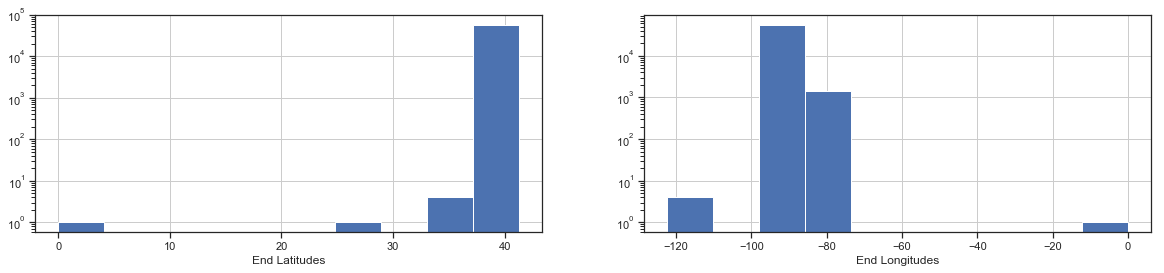

In [258]:
fig, ax =plt.subplots(1,2,figsize=(20,4))
c_a['EndLatitude'].hist(ax=ax[0])
c_a['EndLongitude'].hist(ax=ax[1])
ax[0].set_xlabel('End Latitudes')
ax[1].set_xlabel('End Longitudes')
ax[0].set_yscale('log')
ax[1].set_yscale('log')
plt.show()

A quick look shows us most EndLatitudes are between the 30 and 40 range and End Longitudes are between -100 and -70

In [259]:
c_b.describe([.005,.25,.75,.995])

,trip_id,distance_meters,start_latitude,start_longitude,end_latitude,end_longitude
count,1.057800e+04,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000
mean,3.250132e+07,1486.692759,38.233344,-85.753961,38.232768,-85.738549
std,3.244806e+06,2203.422186,0.018315,0.014404,0.286526,1.587107
min,2.626508e+07,0.000000,38.090000,-85.810000,19.420000,-121.890000
0.5%,2.636016e+07,0.000000,38.200000,-85.780000,38.200000,-85.780000
25%,2.977741e+07,479.000000,38.220000,-85.760000,38.220000,-85.760000
50%,3.303032e+07,913.000000,38.230000,-85.760000,38.230000,-85.760000
75%,3.500597e+07,1754.000000,38.250000,-85.750000,38.250000,-85.750000
99.5%,3.718217e+07,9996.070000,38.260000,-85.700000,38.270000,-85.690000
max,3.760439e+07,100000.000000,38.320000,-85.560000,48.860000,2.360000


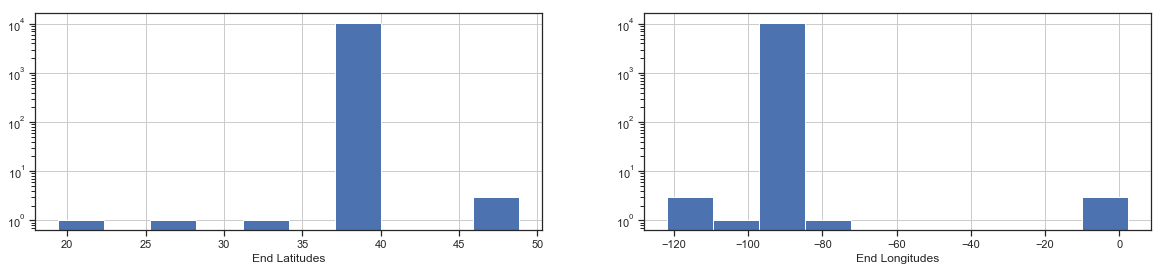

In [260]:
fig, ax =plt.subplots(1,2,figsize=(20,4))
c_b['end_latitude'].hist(ax=ax[0])
c_b['end_longitude'].hist(ax=ax[1])
ax[0].set_xlabel('End Latitudes')
ax[1].set_xlabel('End Longitudes')
ax[0].set_yscale('log')
ax[1].set_yscale('log')
plt.show()

A quick look shows us most EndLatitudes are between the 35 and 40 range and End Longitudes are between -120 and -70

- We notice company a has 1 Null EndLatitude and 1 Null EndLongitude, and company_b has no Null rows.
- We observe both datasets have very similar Lats and Lons until the maximum/minimum values. Changing around the percentiles we notice even at the top 99.5% and bottom .05% the  end latitudes and end longitudes don't differ too much from the median. We'll apply a rule of thumb and restrict our data to be between .05% percentile and 99.5% percentile for End Latitude and End Longitude.
- We also notice Trip Distance in Company A has very large variations, and Trip Distance in Company B has a very large max meters traveled, and also a min distance of 0 meters traveled

In [261]:
def restrict_percentile(df,columns):
    """ 
        This function restricts our dataset to between .05% percentile and the 99.5% percentile 
        from a list of columns. 
  
        Parameters: 
            df (dataframe): dataframe that needs restriction
            columns (list): column names that we restrict on
        Returns: 
            dataframe: A dataframe with applied restrictions. 
        """
    for column in columns:
        lower,upper = df[column].quantile([.005,.995])
        df = df[(df[column]>=lower)&(df[column]<=upper)]
    return df

0      374
768     17
401     16
613     13
877     13
Name: distance_meters, dtype: int64


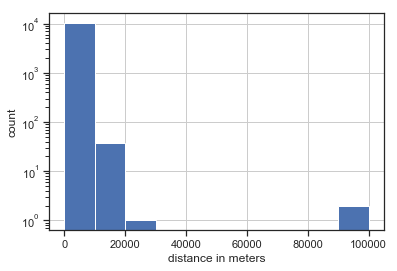

In [262]:
# We will remove the 1 missing value row from our dataset
c_a = c_a.dropna()
# Looking at the quantiles it seems only the most extreme values for latitude/longitude differ, 
# we shall use lat/lon values between .05% to 99.5% quantile for our analysis, this removes 2% of our data from both datasets
c_a = restrict_percentile(c_a,['EndLatitude','EndLongitude'])
c_b = restrict_percentile(c_b,['end_latitude','end_longitude'])
# We won't be using trip distance for company A due to no defined metrics and having wide variance (even including negative values), 
# We'll visualize distance meters for company B with a histogram to look for interesting trends
print(c_b['distance_meters'].value_counts().nlargest(5))
c_b['distance_meters'].hist()
plt.xlabel('distance in meters')
plt.ylabel('count')
plt.yscale('log')
plt.show()



Interestingly the most common ride distance is 0 meters, and we observe an outlier of 100000 meters, perhaps marking the max distance the scooters can track.

# Part 1. Describe the operations of these two mobility companies.
To describe operations I will be focusing on the following features
- User activity
- Trip duration/length
- Trip Location
- Business Growth



## Feature Engineering + Further EDA

In order to explore Trip duration and User activity we need to construct new columns from the data we are provided with. We create several new time based variables including 
- TravelTime: total time traveled from start time to end time
- TravelTime_minute: TravelTime broken down to minutes
- StartDay: the name of day a trip started (ex. Monday,Tuesday,..)
- StartDate: the date travel started
- StartHour: the hour travel started

In [263]:
c_a['TravelTime']= pd.to_datetime(c_a['EndTime'])-pd.to_datetime(c_a['StartTime'])
c_a['TravelTime_minute'] = pd.to_timedelta(c_a['TravelTime']).dt.total_seconds()/60
c_a['StartDate'] = pd.to_datetime(c_a['StartTime']).dt.date
c_a['StartDay']= pd.to_datetime(c_a['StartTime']).dt.day_name()
c_a['StartTime'] = pd.to_datetime(c_a['StartTime'])
c_a['StartHour'] = c_a['StartTime'].dt.round('H').dt.time

In [264]:
c_b['TravelTime']= pd.to_datetime(c_b['completed_time'])-pd.to_datetime(c_b['start_time'])
c_b['TravelTime_minute'] = pd.to_timedelta(c_b['TravelTime']).dt.total_seconds()/60
c_b['StartDate'] = pd.to_datetime(c_b['start_time']).dt.date
c_b['StartDay']= pd.to_datetime(c_b['start_time']).dt.day_name()
c_b['start_time'] = pd.to_datetime(c_b['start_time'])
c_b['StartHour'] = c_b['start_time'].dt.round('H').dt.time

In [265]:
c_a.describe([.05,.25,.75,.995])

,StartLatitude,StartLongitude,EndLatitude,EndLongitude,TripDistance,TravelTime,TravelTime_minute
count,56642.000000,56642.000000,56642.000000,56642.000000,5.664200e+04,56642,56642.000000
mean,38.243538,-85.745617,38.243184,-85.745516,1.509863e+02,0 days 00:15:42.322658,15.705378
std,0.015728,0.019426,0.016058,0.019388,1.360765e+04,0 days 00:29:30.841157,29.514019
min,38.150000,-85.850000,38.200000,-85.780000,-1.034441e+04,0 days 00:00:00,0.000000
5%,38.220000,-85.760000,38.210000,-85.760000,0.000000e+00,0 days 00:02:00,2.000000
25%,38.230000,-85.760000,38.230000,-85.760000,2.900000e-01,0 days 00:04:00,4.000000
50%,38.250000,-85.750000,38.250000,-85.750000,7.500000e-01,0 days 00:09:00,9.000000
75%,38.260000,-85.740000,38.260000,-85.740000,1.700000e+00,0 days 00:19:00,19.000000
99.5%,38.270000,-85.690000,38.270000,-85.690000,9.820000e+00,0 days 01:52:00,112.000000
max,38.320000,-85.560000,38.270000,-85.670000,1.334378e+06,2 days 04:47:00,3167.000000


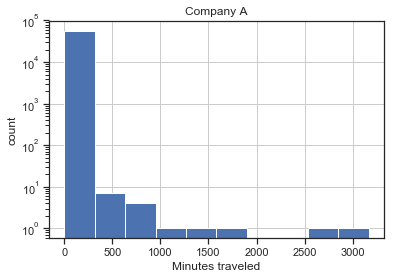

In [266]:
c_a['TravelTime_minute'].hist()
plt.xlabel('Minutes traveled')
plt.ylabel('count')
plt.yscale('log')
plt.title('Company A')
plt.show()


In [267]:
c_b.describe([.05,.25,.75,.995])

,trip_id,distance_meters,start_latitude,start_longitude,end_latitude,end_longitude,TravelTime,TravelTime_minute
count,1.047000e+04,10470.000000,10470.000000,10470.000000,10470.000000,10470.000000,10470,10470.000000
mean,3.251371e+07,1452.447469,38.233387,-85.754223,38.233223,-85.753885,0 days 00:13:08.123973,13.135400
std,3.247726e+06,2131.525764,0.017863,0.012760,0.018010,0.013617,0 days 00:19:34.193058,19.569884
min,2.626508e+07,0.000000,38.160000,-85.810000,38.200000,-85.780000,0 days 00:00:07,0.116667
5%,2.673888e+07,22.000000,38.210000,-85.760000,38.210000,-85.770000,0 days 00:01:42,1.700000
25%,2.978436e+07,477.000000,38.220000,-85.760000,38.220000,-85.760000,0 days 00:03:38,3.633333
50%,3.304597e+07,907.000000,38.230000,-85.760000,38.230000,-85.760000,0 days 00:06:14,6.233333
75%,3.501236e+07,1727.750000,38.250000,-85.750000,38.250000,-85.750000,0 days 00:13:25,13.416667
99.5%,3.718173e+07,9387.470000,38.260000,-85.700000,38.270000,-85.700000,0 days 01:51:07.340000,111.122333
max,3.759851e+07,100000.000000,38.270000,-85.660000,38.270000,-85.690000,0 days 11:36:48,696.800000


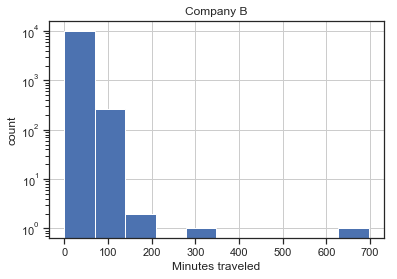

In [268]:
c_b['TravelTime_minute'].hist()
plt.xlabel('Minutes traveled')
plt.ylabel('count')
plt.yscale('log')
plt.title('Company B')
plt.show()

 We notice from our initial cleaning, the outliers for end latitudes and longitudes have been removed. We notice a similar pattern in TravelTime, where most of the data are within short time intervals with max being much larger than the 99.5% quantile. We again apply the rule of thumb and use the restrict_percentile function to eliminate outliers

In [269]:
c_a = restrict_percentile(c_a,['TravelTime'])
c_b = restrict_percentile(c_b,['TravelTime'])

In [270]:
print(max(c_a['TravelTime']))
print(max(c_b['TravelTime']))

0 days 01:52:00
0 days 01:50:49


By trimming down each dataset by 3% (removing 1% for each column, (EndLatitude, EndLongitude,TravelTime)) we have gotten a dataset free of outliers, which we will use for the rest of our analysis

## User Activity Exploration
Now that we have cleaned up our dataset we can look at how our user is using our service. We shall break this down into 2 components. 
1. Number of rides on a daily level over a week
2. Number of rides on a hourly level over a week


### Number of Rides on a daily level

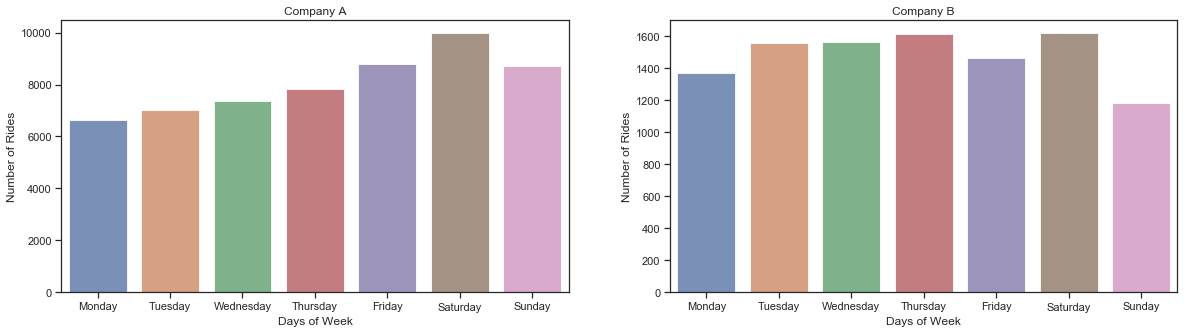

In [271]:
c_days = c_a['StartDay'].value_counts()
c_days_b = c_b['StartDay'].value_counts()

fig, ax =plt.subplots(1,2,figsize=(20,5))
sns.barplot(c_days.index, c_days.values, alpha=0.8,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],ax=ax[0],)
sns.barplot(c_days_b.index, c_days_b.values, alpha=0.8,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],ax=ax[1])

ax[0].set_title('Company A')
ax[0].set_xlabel('Days of Week')
ax[0].set_ylabel('Number of Rides')
ax[1].set_title('Company B')
ax[1].set_xlabel('Days of Week')
ax[1].set_ylabel('Number of Rides')
plt.show()

Looking at this breakdown of rides on a week level we notice that company A and company B attract different types of riders. Company A has more rides on the weekends, while company B has a more uniform distribution of ride volume throughout the week.

### Number of rides on an hourly level

In [272]:
# Retructuring data
data_a =  c_a.groupby(['StartHour','StartDay']).count()['TripID'].unstack()
data_b =  c_b.groupby(['StartHour','StartDay']).count()['trip_id'].unstack()
# Reordering columns
data_a = data_a[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].fillna(0)
data_b = data_b[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].fillna(0)

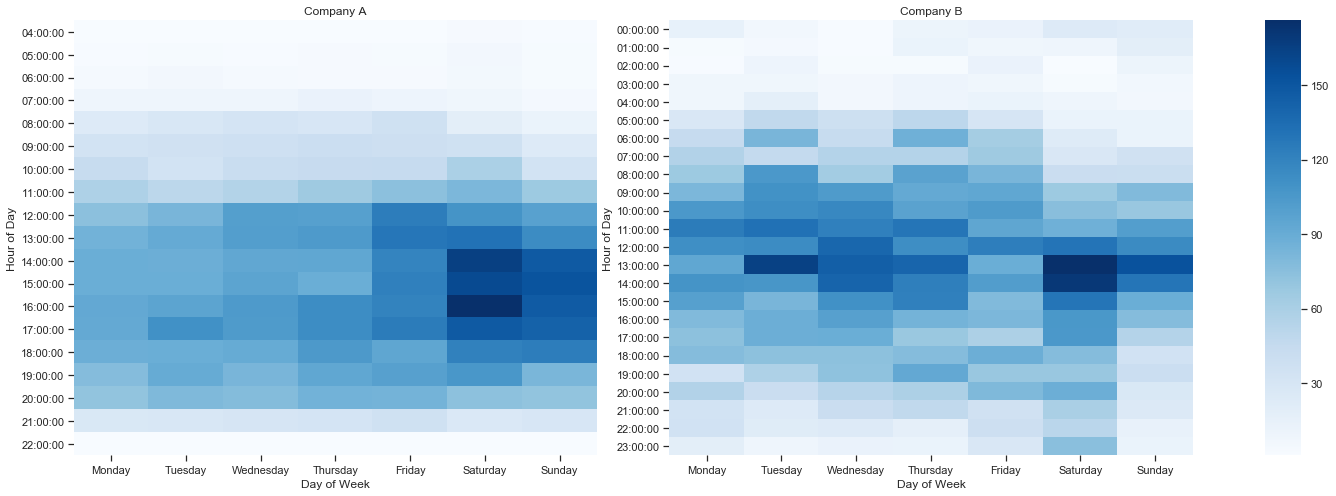

In [273]:
fig, ax =plt.subplots(1,3,figsize=(22,8),gridspec_kw={'width_ratios':[1,1,0.07]})
sns.heatmap(data_a,cmap="Blues",cbar=False,ax=ax[0])
sns.heatmap(data_b,cmap="Blues",ax=ax[1],cbar_ax=ax[2])
ax[0].set_title('Company A')
ax[0].set_ylabel('Hour of Day')
ax[0].set_xlabel('Day of Week')
ax[1].set_title('Company B')
ax[1].set_ylabel('Hour of Day')
ax[1].set_xlabel('Day of Week')
plt.show()


From the above heatmap we can see most of Company A's rides are taken between 11:00 am to 8:00pm, while Company B's rides seem to have a more spread out time span, with different days experiencing different time span of rides (ex. Saturday rides start later and end later).

## Trip Duration/Length
- Explore Travel Time
- Explore Travel distance

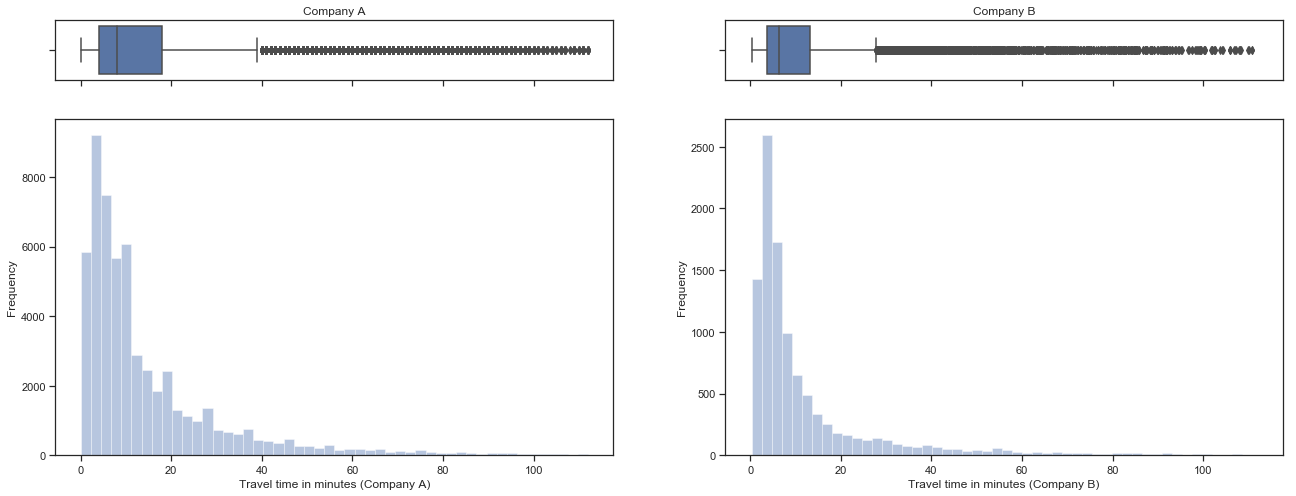

In [274]:
sns.set(style="ticks")


f, ax = plt.subplots(2,2, figsize=(22,8), sharex=True,gridspec_kw={"height_ratios": [.15, .85]})
sns.boxplot(c_a['TravelTime_minute'], ax=ax[0][0])
sns.distplot(c_a['TravelTime_minute'], ax=ax[1][0],kde=False)
sns.boxplot(c_b['TravelTime_minute'], ax=ax[0][1])
sns.distplot(c_b['TravelTime_minute'], ax=ax[1][1], kde=False)
ax[0][0].set(xlabel='')
ax[0][0].set_title('Company A')
ax[0][1].set(xlabel='')
ax[0][1].set_title('Company B')
ax[1][0].set(xlabel='Travel time in minutes (Company A)')
ax[1][0].set(ylabel='Frequency')
ax[1][1].set(xlabel='Travel time in minutes (Company B)')
ax[1][1].set(ylabel='Frequency')
plt.show()

In [275]:
print(f'company a median {c_a["TravelTime_minute"].median()}')
print(f'company b median {c_b["TravelTime_minute"].median()}')      

company a median 8.000000000000002
company b median 6.233333333333333


It seems in general both companies have short rides, with over 75% of rides being under 40 minutes and having medians of 8 and 6 minutes respectively.

### Travel distance
- We will not be examining company a due to undefined distance metric
- We will look at company b's distance distribution once we remove 0 values and outliers

From our initial eda we observe distance_meters defined in c_b has many values set at 0 and a max distance of 100000. We shall remove these values and continue our observation

In [276]:
c_b_distance = c_b[(c_b['distance_meters']>0) & (c_b['distance_meters']<100000)]

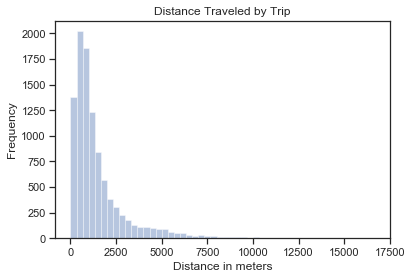

In [277]:
sns.distplot(c_b_distance['distance_meters'],kde=False)
plt.title('Distance Traveled by Trip')
plt.xlabel('Distance in meters')
plt.ylabel('Frequency')
plt.show()


In [278]:
c_b_distance['distance_meters'].describe()

count    10001.000000
mean      1479.905309
std       1616.360648
min          1.000000
25%        527.000000
50%        946.000000
75%       1768.000000
max      16676.000000
Name: distance_meters, dtype: float64

Text(0, 0.5, 'Distance in Meters')

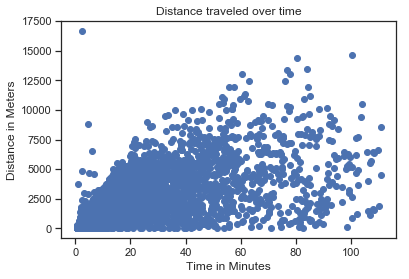

In [279]:
plt.scatter(c_b_distance['TravelTime_minute'],c_b_distance['distance_meters'])
plt.title('Distance traveled over time')
plt.xlabel('Time in Minutes')
plt.ylabel('Distance in Meters')

In [280]:
c_b_distance['TravelTime_minute'].corr(c_b_distance['distance_meters'])

0.6932641903177296

We see most trips are relatively short with a median of under 1km and no trips exceeding 20km with outliers removed.
We notice a slight correlation between distance and time. One unusual data point worth mentioning is one scooter has traveled around 17km in under 10 minutes, which is considered extremely fast even for a car.

## Location of Operation
- We shall look at the spread and locations of Latitude and Longitude
- I shall externally look at these coordinates through Google maps to have a clearer understanding

In [281]:
c_a[['StartLongitude','StartLatitude','EndLongitude','EndLatitude']].describe()

,StartLongitude,StartLatitude,EndLongitude,EndLatitude
count,56362.000000,56362.000000,56362.000000,56362.000000
mean,-85.745631,38.243519,-85.745536,38.243180
std,0.019422,0.015740,0.019378,0.016067
min,-85.850000,38.150000,-85.780000,38.200000
25%,-85.760000,38.230000,-85.760000,38.230000
50%,-85.750000,38.250000,-85.750000,38.250000
75%,-85.740000,38.260000,-85.740000,38.260000
max,-85.560000,38.320000,-85.670000,38.270000


In [282]:
# Get most common starting and ending coordinates for company a
c_a['start'] = c_a.apply(lambda x: (x['StartLongitude'],x['StartLatitude']),axis=1)
c_a['end'] = c_a.apply(lambda x: (x['EndLongitude'],x['EndLatitude']),axis=1)
print(f'most common starting coordinates for company a: {c_a.groupby("start")["TripID"].count().idxmax()}')
print(f'most common ending coordinates for company a: {c_a.groupby("end")["TripID"].count().idxmax()}')

most common starting coordinates for company a: (-85.76, 38.25)
most common ending coordinates for company a: (-85.76, 38.25)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  


count    56362.000000
mean         0.632339
std          0.986969
min          0.000000
25%          0.000000
50%          0.082579
75%          1.116878
max         16.760876
Name: start_end_distance, dtype: float64


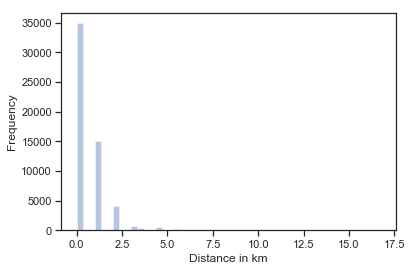

In [283]:
# Get information on distance between start and end points for company a
c_a['start_end_distance'] = c_a.apply(lambda x: vincenty(x['start'],x['end']).km,axis=1)
print(c_a['start_end_distance'].describe())
sns.distplot(c_a['start_end_distance'],kde=False)
plt.xlabel('Distance in km')
plt.ylabel('Frequency')
plt.show()

In [284]:
print (f'number of unique company a start locations {len(c_a["start"].value_counts())}')

number of unique company a start locations 136


In [285]:
c_b[['start_longitude','start_latitude','end_latitude','end_longitude']].describe()

,start_longitude,start_latitude,end_latitude,end_longitude
count,10367.000000,10367.000000,10367.000000,10367.000000
mean,-85.754235,38.233373,38.233205,-85.753898
std,0.012735,0.017865,0.018019,0.013600
min,-85.810000,38.160000,38.200000,-85.780000
25%,-85.760000,38.220000,38.220000,-85.760000
50%,-85.760000,38.230000,38.230000,-85.760000
75%,-85.750000,38.250000,38.250000,-85.750000
max,-85.660000,38.270000,38.270000,-85.690000


In [286]:
# Get most common starting and ending coordinates for company b
c_b['start'] = c_b.apply(lambda x: (x['start_longitude'],x['start_latitude']),axis=1)
c_b['end'] = c_b.apply(lambda x: (x['end_longitude'],x['end_latitude']),axis=1)
print(f'most common starting coordinates for company b: {c_b.groupby("start")["trip_id"].count().idxmax()}')
print(f'most common ending coordinates for company b: {c_b.groupby("end")["trip_id"].count().idxmax()}')

most common starting coordinates for company b: (-85.76, 38.22)
most common ending coordinates for company b: (-85.76, 38.22)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  


count    10367.000000
mean         0.513169
std          0.799849
min          0.000000
25%          0.000000
50%          0.082579
75%          1.116878
max          7.829214
Name: start_end_distance, dtype: float64


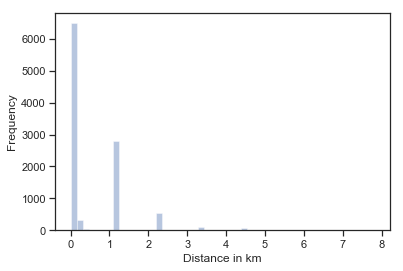

In [287]:
# Get information on distance between start and end points for company b
c_b['start_end_distance'] = c_b.apply(lambda x: vincenty(x['start'],x['end']).km,axis=1)
print(c_b['start_end_distance'].describe())
sns.distplot(c_b['start_end_distance'],kde=False)
plt.xlabel('Distance in km')
plt.ylabel('Frequency')
plt.show()

In [288]:
print (f'number of unique company b start locations {len(c_b["start"].value_counts())}')

number of unique company b start locations 69


From looking at external Google maps data of the most common starting/ending locations for company A and company B we see both companies operate out of Louisville Kentucky. One interesting thing to note is company A operates closer to the Ohio River, while company B operates more inland. This may help explain why company A sees more business on the weekends (rides along the river during weekends?), while Company B experiences more uniform traffic throughout the week. A quick look at distance between starting and end points shows us while most trips end under 1 km of the starting lat/lon, but there are occasional outliers. We also further note the scooters are dockless due to the amount of unique starting lat/lons. If there were docks, there would be very limited amount of starting lats/lons.

## Business Growth
When examing business growth we shall look at the following core metrics:
- Number of trips over months
- Number of trips/Number of scooters per day 

### Trips overs Months

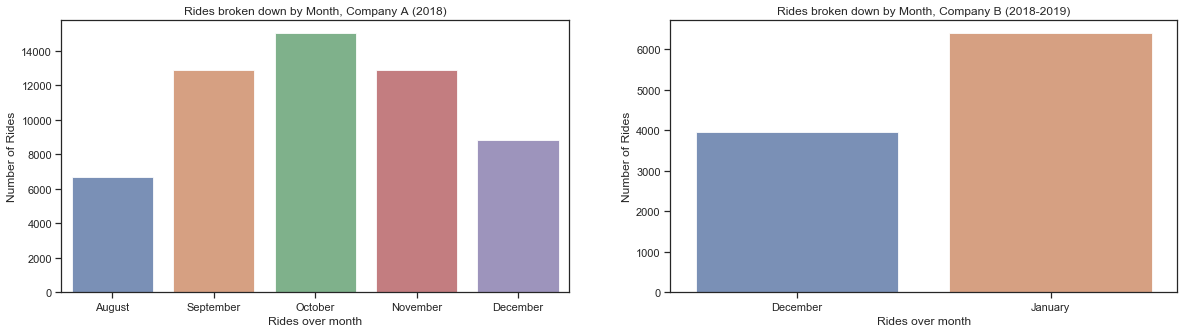

In [289]:
c_a['StartMonth']=c_a['StartTime'].astype('datetime64[ns]').dt.month_name()
c_month_a = c_a['StartMonth'].value_counts()
c_b['StartMonth']=c_b['start_time'].astype('datetime64[ns]').dt.month_name()
c_month_b = c_b['StartMonth'].value_counts()
fig, ax =plt.subplots(1,2,figsize=(20,5))
sns.barplot(c_month_a.index, c_month_a.values, alpha=0.8,order=['August','September','October','November','December'],ax=ax[0])
sns.barplot(c_month_b.index, c_month_b.values, alpha=0.8,order=['December','January'],ax=ax[1])

ax[0].set_title('Rides broken down by Month, Company A (2018)')
ax[0].set_ylabel('Number of Rides', fontsize=12)
ax[0].set_xlabel('Rides over month', fontsize=12)
ax[1].set_title('Rides broken down by Month, Company B (2018-2019)')
ax[1].set_ylabel('Number of Rides', fontsize=12)
ax[1].set_xlabel('Rides over month', fontsize=12)
plt.show()

Company A seems to have increasing rides up until November. A hypothesis for this trend may be due to colder seasons attracting fewer riders. For company B, we only see a growth from December to January. This may be caused by a rise in popularity of the scooter itself, or a rise in temperature from December to January. Other things to warrant further exploration is if Company B has taken any of Company A's customers in the month of December

### Trips volume / Scooter volume overtime
- Number of trips over months is a raw metric of business success. A major drawback of this metric is that it fails to account for the availabilty of scooters. In an ideal scenario, as more scooters are injected into the market the amount of riders should grow with proportionally. (ex. if 10 scooters brings 20 riders, we should expect 100 scooters to bring 200 riders).
- We define the metric trips per scooter (number of trips/number of scooters) to measure demand.
- A high trips per scooter corresponds to situations where there are a high demand for scooters (a few scooters are getting multiple amount of rides) while a low trips per scooter corresponds to a low demand (many scooters are getting few rides). 

In [290]:
c_a['week'] = c_a['StartTime'].dt.strftime('%U')

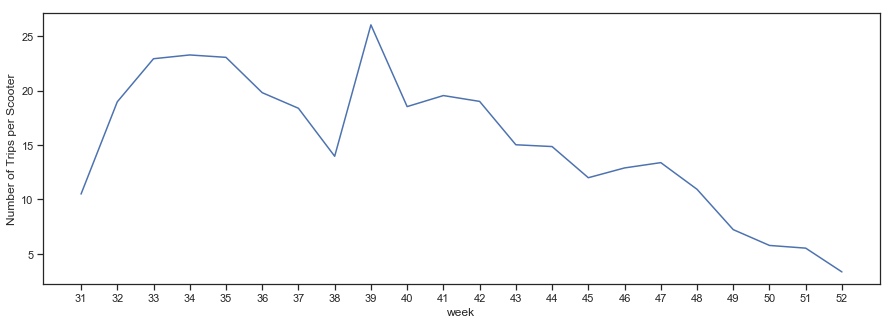

In [291]:
c_a_TS = c_a.groupby('week').TripID.size().reset_index()
c_a_TS = c_a_TS.merge(c_a.groupby('week').ScooterID.nunique().reset_index(),on='week')
c_a_TS['TS'] = c_a_TS['TripID']/c_a_TS['ScooterID']
plt.figure(figsize=(15,5))
sns.lineplot(x='week',y='TS',data=c_a_TS)
plt.ylabel('Number of Trips per Scooter')
plt.show()

We plot how trips per scooter changes on a weekly basis to avoid noisiness of daily data. We notice initial growth followed by a steady decline as the year ends. Again this may be due to seasonal effects such as a cold winter

# Summary

Company A and B are dockless scooter companies that operate in Louisville Kentucky. Company A operates closer to water (the Ohio River) and company B operates more inland. Trips for both companies are under typically short with median trip times of 8 and 6 minutes respectively. Company B also shows us most trips are short with a median distance just under 1km.

Company A tends to experience more rides on weekends, with most ride traffic coming in between 11:00 am and 8:00pm. Company B has a more uniform distribution of trips across the week with times of operation changing on a day to day basis. 

In terms of business growth Company A has been on a steady decline since November, with both total amount of trips and demand for trips (measured by trips per scooter) falling. A possible external explanation may be due to the arrival of winter. Meanwhile Company B has grown in number of trips since it began data tracking. An explanation for this may be due to novelty effect or January being warmer than December.



# 2. Estimate number of scooters company b operates in this geography (simple)
- Assuming company a's and company b's operates the same, we can solve the following equation:
- (Number of Company A trips)/ (Number of unique Company A scooters operates) = (Number of Company B trips)/(Number of unique Company B scooters operates)
- We get (Number of unique Company B scooters operates) = ((Number of Company B Trips) * (Number of unique Company A scooters operates))/(Number of Company A trips)
- We will do this with the outliers removed datasets

In [292]:
company_a_trips = len(c_a['TripID'].unique())
company_a_scooters = len(c_a['ScooterID'].unique())
company_b_trips = len(c_b['trip_id'].unique())
company_b_scooters = (company_b_trips*company_a_scooters)/company_a_trips

In [293]:
print (f'Number scooters company b operates: {int(company_b_scooters)}')

Number scooters company b operates: 157


### More detailed ideas
- If we assume company B's growth is due to a novelty effect we can re-solve the equation with a restriction to the first 2 months of data for both companies
- If we want to adjust to seasonal effects we can restrict the data to when company A and company B are operating in the same month of December and re-solve the equation.